# Exercise 3 - Binary Classification with Logistic Regression (30 Points)

This exercise is meant to familiarize you with the complete pipeline of solving a machine learning problem. You
need to obtain and pre-process the data, develop, implement and train a machine learning model and evaluate it
by splitting the data into a train and testset.

First, we will derive and implement all the functions we need and put it into a single class.

In a second part, we will use this class to build a spam filter.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- christoph.staudt@uni-jena.de

### Submission

- Deadline of submission:
        12.05.2021 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=28746)

 

### Again if you have any troubles with one of the steps please reach out, as you will not be able to move on with the next steps in most cases 


In [22]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

## Data Preparation

In the model of *logistic regression*, we have $m$ samples $x_i\in\mathbb{R}^n$ with labels $y_i\in\{-1,1\}$.
In this exercise, we will use the equivalent formulation with $y_i\in\{0,1\}$.
We use the example dataset `data.npy`, where we have 2 dimensional features (first two columns) and a binary label (3rd column).

### Task 1 (1 Point)
Load and split the dataset into samples and labels. Then plot the data with a scatterplot and use different colors for different labels.

Text(0, 0.5, 'X1')

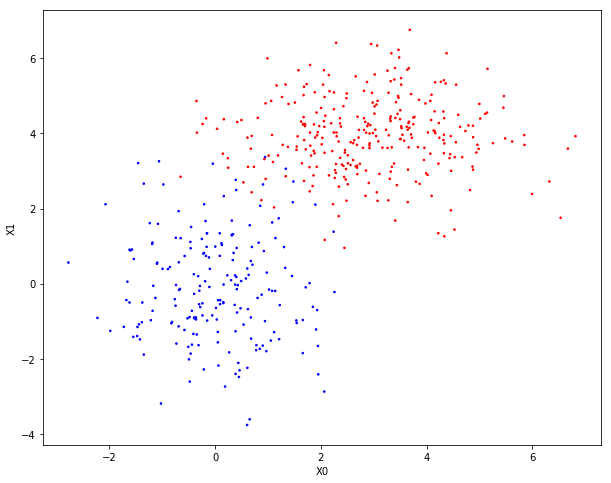

In [23]:
# TODO: Load and split dataset

# load data
data = np.load('data.npy')
X = data[:,:-1]
Y = data[:,-1]

# TODO: plot data
plt.scatter(X[:,0], X[:,1], c=Y, cmap='bwr', s=2.5)
plt.xlabel("X0")
plt.ylabel("X1")


The function $\sigma$ is called the logistic *sigmoid function*:

$
\sigma(a) = \cfrac{1}{1+\exp(-a)}\ .
$

Derivate = $ \sigma(a) * (1-\sigma(a)) $

###  Task 2 (1 Point)
Implement a vectorized logistic sigmoid function, i.e. it takes a vector of x-coordinates X and returns a vector of their respective y values. Use it to plot the function between -10 and 10.

Text(0, 0.5, 'Sigmoid(X)')

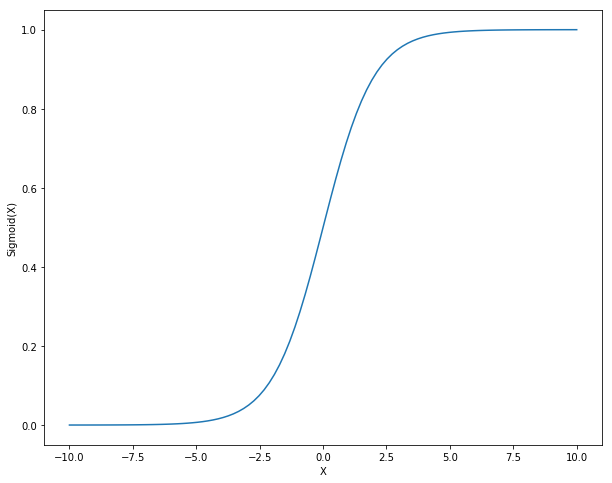

In [24]:
def sigmoid(X):
    # TODO: implement sigmoid function
    return 1/(1 + np.exp(-X))

# TODO: Plot function from -10 to 10
sigmoid_x = np.linspace(-10, 10, 100)
sigmoid_y = sigmoid(sigmoid_x)
  
plt.plot(sigmoid_x, sigmoid_y)
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")

The goal in logistic regression is to find the parameter vector $\theta\in\mathbb{R}^n$, so that 

\begin{align}
p(y_i=1|x_i,\theta)=\sigma(x_i^T\theta) \quad &
p(y_i=0|x_i,\theta)=1-p(y_i=1|x_i,\theta)
\end{align}

fits our data and can be used to predict the label on unseen data (binary classification).


With an estimated $\theta$, a new feature $x\in\mathbb{R}^n$ is classified according to:

$
\hat{y} = \begin{cases}
1\text{, if \ }p(y=1|x,\theta)\geq 0.5\\
0\text{, else}
\end{cases}.
$

Since $\sigma(0) =  1/(1+\exp(0)) = 1/2$. This is equivalent to 
$\hat{y} = \begin{cases}
1\text{,\ if \ } x_i^T\theta \geq 0\\
0\text{,\ else}
\end{cases}$
 as noted in the lecture.

### Task 3 (1 Point)
Prepare `X` so that the classification function for an estimated $\theta$ is [*affine*](https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function). Add this affine component at the **first column**.

In [25]:
# TODO: Prepare X
X=np.insert(X,0,1.0,axis=1)
X[:3]

array([[ 1.        ,  4.8777683 ,  3.89871851],
       [ 1.        , -1.1680935 , -0.05555429],
       [ 1.        , -0.68944918,  1.92973945]])

### Task 4 (1 Point)

Implement a `predict` function based on the above definition of probabilities.
The function should take $m$ input features $X\in\mathbb{R}^{m\times n}$ and a vector $\theta$ as input and output predictions $\hat{Y}\in\{0,1\}^m$.

Test your function with a randomly chosen $\theta$.

In [26]:
def predict(X,theta):
    return (X @ theta >= 0).astype('int')

def predict2(X,theta):
    # TODO: calculate and return predictions
    prob = sigmoid(X @ theta)
    return np.round(prob)

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
print(theta)
print(predict(X, theta))
np.allclose(predict(X,theta), predict2(X,theta))


[0.5488135  0.71518937 0.60276338]
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 

True

## Learning $\theta$

For a given $\theta$, we can calculate $p(y|x,\theta)$ and use this probability for classification.
To evaluate how well a learned $\theta$ can be used to classify our data, we define a *loss function*.
Here we want to use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) given as:
$
L(\theta) = -\cfrac{1}{m}\sum_{i=1}^m y_i\log(p(y_i=1|x_i,\theta))+(1-y_i)\log(1-p(y_i=1|x_i,\theta))
$
Often it is convenient to have multiple metrics at hand. In classification problems, the *accuracy* of a
prediction is defined as the percentage of correctly classified features. In the case of logistic regression, this corresponds to 

$
Acc(\theta) = \cfrac{1}{m}\sum_{i=1}^m y_i \hat{y_i} + (1-y_i)(1-\hat{y_i})
$
where $\hat{y_i}$ is the prediction for $x_i$.

As our model becomes better, we expect the accuracy to increase and the loss to decrease.  

### Task 5 (2 Points)
Implement the binary cross entropy and the accuracy for logistic regression. 
The loss takes the features $X$, the true labels $Y$ and the parameter vector $\theta$ as input, whereas the accuracy only needs $Y$ and the predicted labels $\hat{Y}$.

Again, test your functions with a randomly chosen $\theta$.

In [27]:
def loss(X, Y, theta):
    # TODO: implement binary cross entropy
    probs = sigmoid(X @ theta)
    return -np.mean(Y*np.log(probs) + (1-Y)*np.log(1-probs))

def acc(Y, Y_hat):
    # TODO: implement accuracy
    return np.mean(Y==Y_hat)

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
Y_hat = predict(X, theta)
loss(X,Y,theta), acc(Y, Y_hat)

(0.44557368213985954, 0.73)

Given the loss function $L(\theta)$, we want to minimize this function with respect to the parameters $\theta$, that is we are looking for

\begin{align}
    \text{argmin}_\theta L(\theta)
\end{align}

However, since this is a highly nonlinear optimization problem, we use an iterative approach that starts with an initial estimate for $\theta$ and approaches the solution at each iteration step. 
The most simple approach is to take the gradient
$\nabla L(\theta)$ of $L(\theta)$ with respect to $\theta$ and walk into direction of the negative gradient. 
This method is called gradient-descent.

### Task 6 (3 Points)

Calculate $\nabla L(\theta) = \cfrac{\partial L}{\partial \theta}$ and implement this function.
The resulting function takes features $X$, labels $Y$ and $\theta$ as input and outputs a gradient $\nabla L(\theta)\in\mathbb{R}^n$.

Again, test your function with a randomly chosen $\theta$.




Solution (2 Points):
\begin{align}
\cfrac{\partial L}{\partial \theta} =\cfrac{1}{m}\sum_{i=1}^m x_i (\sigma(x_i^T\theta)-y_i)
\end{align}

In [28]:
def gradient(X,Y,theta):
    # TODO: Implement gradient (1 Point)
    return (X.T @ (sigmoid(X @ theta)- Y))/Y.shape[0]

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
gradient(X,Y,theta)

array([0.23128281, 0.04198473, 0.03934602])

### Task 7 (3 Points)
With the gradient function, implement the *gradient descend* algorithm:

 1. (randomly) choose initial $\hat{\theta}$
 2. update $\hat{\theta} \leftarrow \hat{\theta} -\eta\nabla L(\hat{\theta})$
 3. repeat 2. until a maximum number of iterations $\lambda$ (parameter `max_it`) is reached or the loss did not change more than $\varepsilon$ (parameter `eps`).
 
The hyperparameter $\eta$ is also called *learning rate* (parameter `lr`).

The function should take the features $X$, the labels $Y$ and values for $\eta,\lambda$ and $\varepsilon$ as input and output $\hat{\theta}$.

Test your function.

In [45]:
def fit(X, Y, lr=1e-2, max_it=1000, eps=1e-4):
    # TODO: Implement gradient descend algorithm    
    theta = np.zeros(X.shape[1])
    # Taking uncentered random mostly takes longer
    # Centering it improves performance since its closer to the real value
    theta = np.random.rand(X.shape[1])# -0.5
    current_loss = loss(X,Y,theta)
    for it in range(max_it):
        grad = gradient(X,Y,theta)
        
        # update
        theta = theta - lr*grad
        
        # determine accuracy
        Y_hat = predict(X,theta)
        accuracy = acc(Y, Y_hat)
        
        # determine loss
        old_loss = current_loss
        current_loss = loss(X,Y,theta)
        
        if abs(current_loss-old_loss)<eps:
            break
    print(f'Iterations: {it}')        
    return theta

theta = fit(X,Y)
theta

KeyboardInterrupt: 

### Task 8 (4 Points)

Now we have all functionalities and want to bring them together in a single class.

- Use the previously defined functions to implement the `LogReg` class. 
- Make use of the fact, that you can store parameters as attributes. 
- Additionaly track the losses and accuracies that occur during the iterations of gradient descend. 
- Test your class (on the prepared data from above) and plot the accuracies and losses over the iterations.

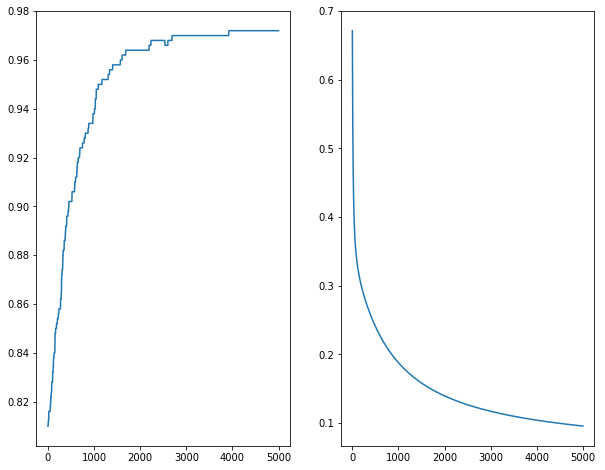

In [30]:
class LogReg():
    # TODO: fill in functions
    
    def __init__(self):
        self.theta = None
        self.accs = []
        self.losses = []
        
    def sigmoid(self, X):
        return sigmoid(X @ self.theta)

    def predict(self, X):        
        return predict(X,self.theta)
    
    def loss(self, X, Y):
        probs = self.sigmoid(X)
        return -np.mean(Y*np.log(probs) + (1-Y)*np.log(1-probs))

    def acc(self, Y, Y_hat):
        return np.mean(Y==Y_hat)
    
    def gradient(self, X, Y):
        return (X.T @ (self.sigmoid(X)- Y))/Y.shape[0]
    
    def fit(self, X, Y, lr=1e-2, max_it=1000, eps=1e-4):
        # TODO: track losses and accuracies
        self.accs = []
        self.losses = []
        self.theta = np.zeros(X.shape[1])
        current_loss = self.loss(X,Y)
        for it in range(max_it):
            probs = self.sigmoid(X)
            grad = self.gradient(X,Y)

            # update
            self.theta = self.theta - lr*grad

            # determine accuracy
            Y_hat = self.predict(X)
            accuracy = self.acc(Y, Y_hat)

            # determine loss
            old_loss = current_loss
            current_loss = self.loss(X, Y)
            
            #track statistics
            self.losses.append(current_loss)
            self.accs.append(accuracy)

            if abs(current_loss-old_loss)<eps:
                break   
                
# TODO: test class + plot losses/accuracies
alg = LogReg()
alg.fit(X,Y, max_it=5000, eps=0)

fig, axs = plt.subplots(ncols=2)
axs[0].plot(alg.accs)
axs[1].plot(alg.losses)

### Task 9 (2 Points)

So far, we used the whole dataset for fitting the `LogReg` class.

- Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into train (75%) and testset (25%).
- Fit the Logistic Regression model on the trainset and calculate the final accuracies on the train and testset. 
- Experiment with the hyperparameters for fit, to get a good result.

In [31]:
# TODO: Split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# TODO: apply logistic regression
alg = LogReg()
alg.fit(X_train,Y_train, max_it=20000, eps=0, lr=5e-2)

# TODO: determine train and test accuracy
test_preds = alg.predict(X_test)
test_acc = alg.acc(Y_test, test_preds)

train_preds = alg.predict(X_train)
train_acc = alg.acc(Y_train, train_preds)

print(f'Test: {test_acc}\tTrain: {train_acc}')

Test: 0.984	Train: 0.9653333333333334


## Visualization

Next we want to visualize our classifier. To to this, we want to visualize the *decision boundary* defined by $\hat{\theta}$.

The decision boundary is defined as 
$
\{x\in\mathbb{R}^n: p(y=1|x)=0.5\}
$
or as in the lecture:
$\{x\in \{1\} \times \mathbb{R}^n: x^T\hat{\theta}=0\}$


### Task 10 (2 Points)

Implement a function `plot_dec_boundary` that visualizes the data and the regression line for 2 dimensional samples $X$ and an estimated $\hat{\theta}$.

Test this function with the $\hat{\theta}$ estimated in Task 8.

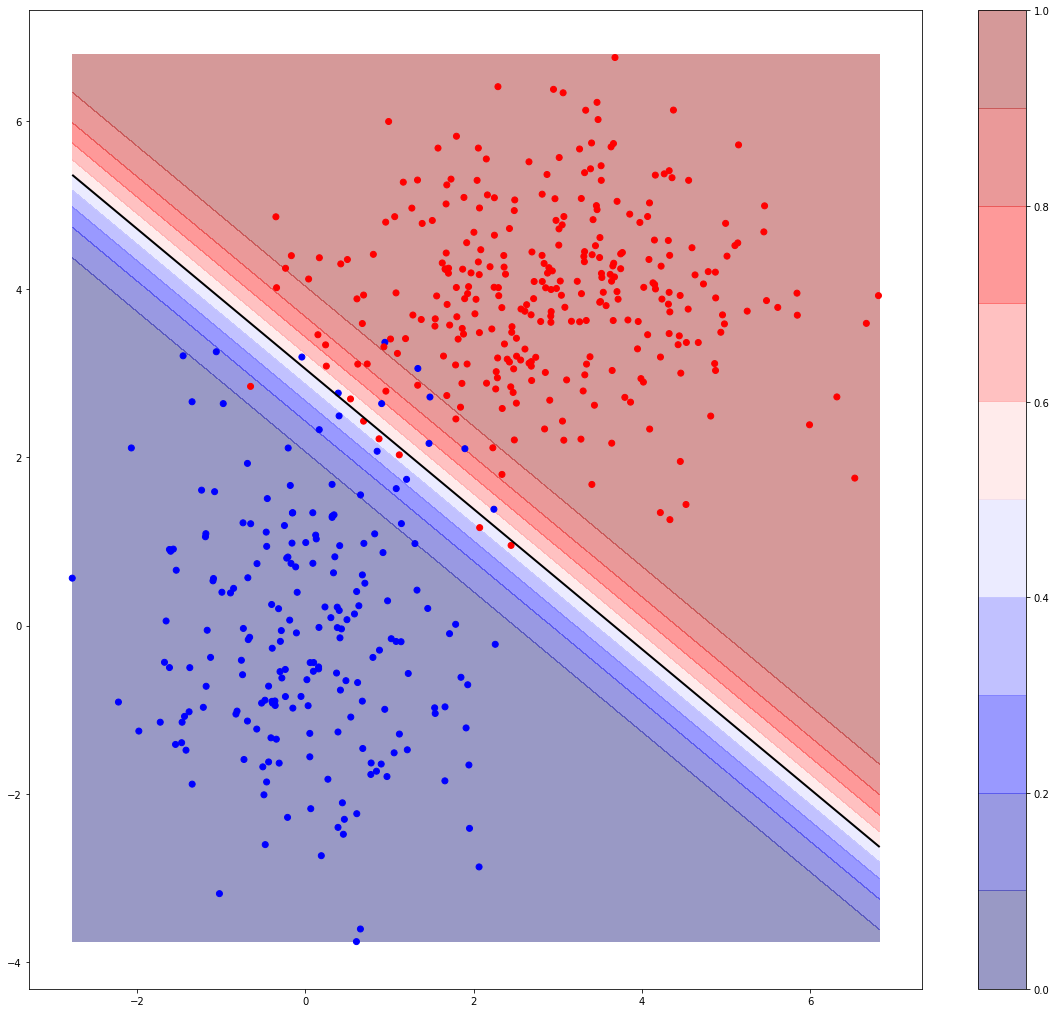

In [41]:
def plot_dec_boundary(X,Y, theta):    
    # TODO: plot data and decision boundary
    
    # make these smaller to increase the resolution
    dx, dy = 0.05, 0.05
    levels = np.arange(0,1.1,1e-1)
    plt.rcParams["figure.figsize"] = (20,18)
    # generate grids + probs
    x1, x2 = np.mgrid[slice(np.min(X[:,1]), np.max(X[:,1]) + dy, dy), slice(np.min(X[:,2]), np.max(X[:,2]) + dx, dx)]
    points = np.stack([np.ones(np.prod(x1.shape)), x1.flatten(),x2.flatten()]).T
    probs = sigmoid(points @ theta).reshape(x1.shape)    

    # plot points + heatmap
    cmap = plt.get_cmap('seismic')
    plt.contourf(x1, x2, probs, cmap=cmap, levels=levels, alpha=0.4,)
    plt.colorbar()
    plt.contour(x1, x2, probs, levels=[0.5], colors='black', linewidths=2)
    plt.scatter(X[:,1],X[:,2], c=Y, cmap='bwr')
    
# TODO: test function
theta = alg.theta
plot_dec_boundary(X,Y, theta)

### Task 11 (2 Points)

Use the [implementation from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a logistic regressor.

Visualize the regression line that you obtain with scikit learn.

/Users/chris/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


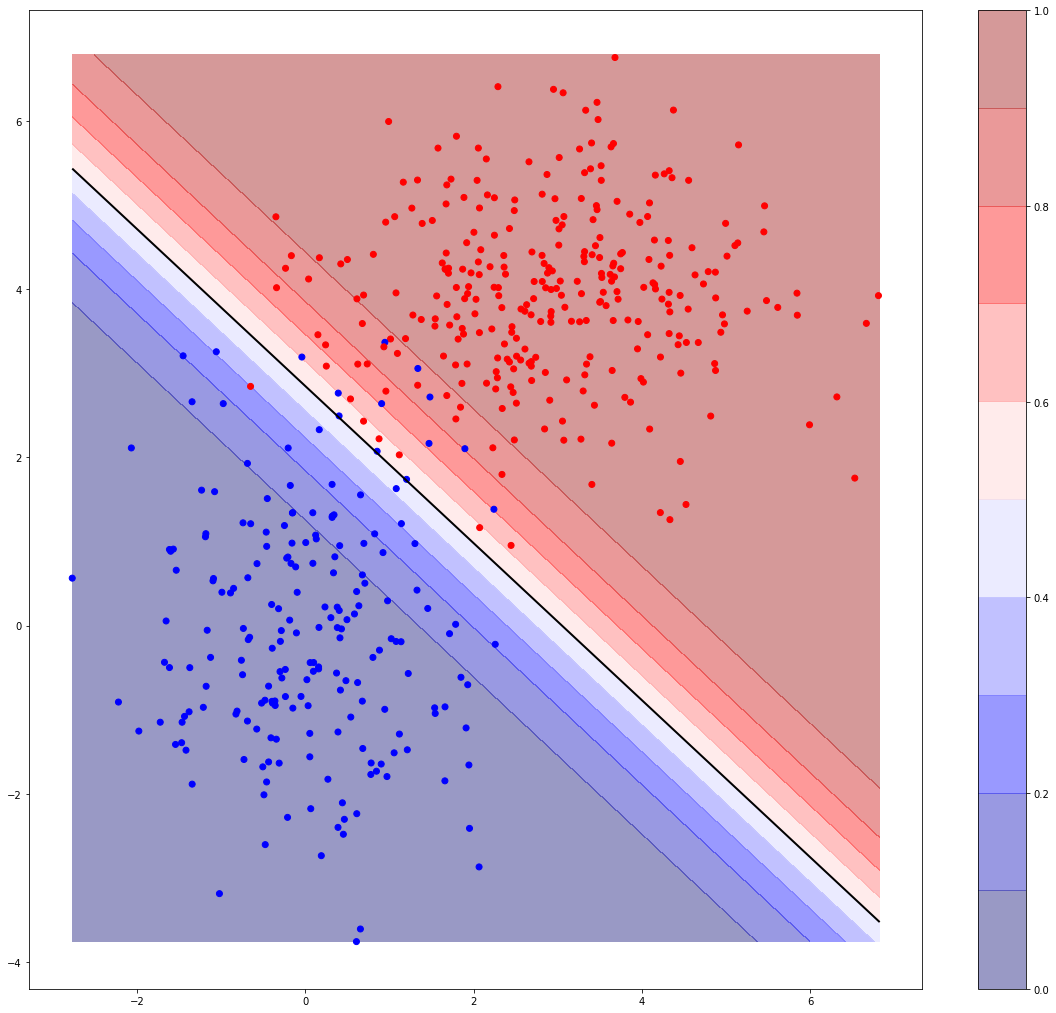

In [42]:
# TODO: estimate theta with scikit-learn (1 Point)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_train, Y_train)
theta = logisticRegr.coef_[0]

# TODO: plot regression line with data (1 Point)
plot_dec_boundary(X,Y, theta)

## Spam Filter

We want to use logistic regression to perform Spam Filtering on the [*UCI SMS Spam Collection*](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) (the certificate expired but accessing the page should still be okay, anyhow a description and the dataset can be found in smsspamcollection,so you don't need to open the page) dataset. The goal is to classify a SMS from its text into the categories "spam" or "ham".

### Task 12 (3 Points)

The dataset is saved as a text file at `SMSSpamCollection.txt`. Find a way to load the dataset and transform the features `X` (SMS) and the labels `Y` (spam/ham) into numerical representations.

Hint:

For transforming SMS into features, check out the bag of words representation from [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [43]:
# TODO: load and preprocess dataset

# read txt
with open('./smsspamcollection/SMSSpamCollection') as inf:
    lines = inf.readlines()
    
# transform to dataframe
data = {'feature': [], 'label': []}
for line in lines:
    label, feature = line.split('\t')
    data['feature'].append(feature)
    data['label'].append(label)
import pandas as pd
df = pd.DataFrame(data = data)

# labels->0,1
df['label'] = df['label'].map({'ham':0, 'spam':1})
Y = np.array(df['label'])

# features into bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['feature']).toarray()

X.shape, Y.shape

((5574, 8713), (5574,))

### Task 13 (2 Points)

Split the dataset into train (75%) and testset (25%) and use your implementation of logistic regression to learn $\theta$ for this dataset. Try to get your accuracy as high as possible.

Test: 0.9741750358680057	Train: 0.9897129186602871


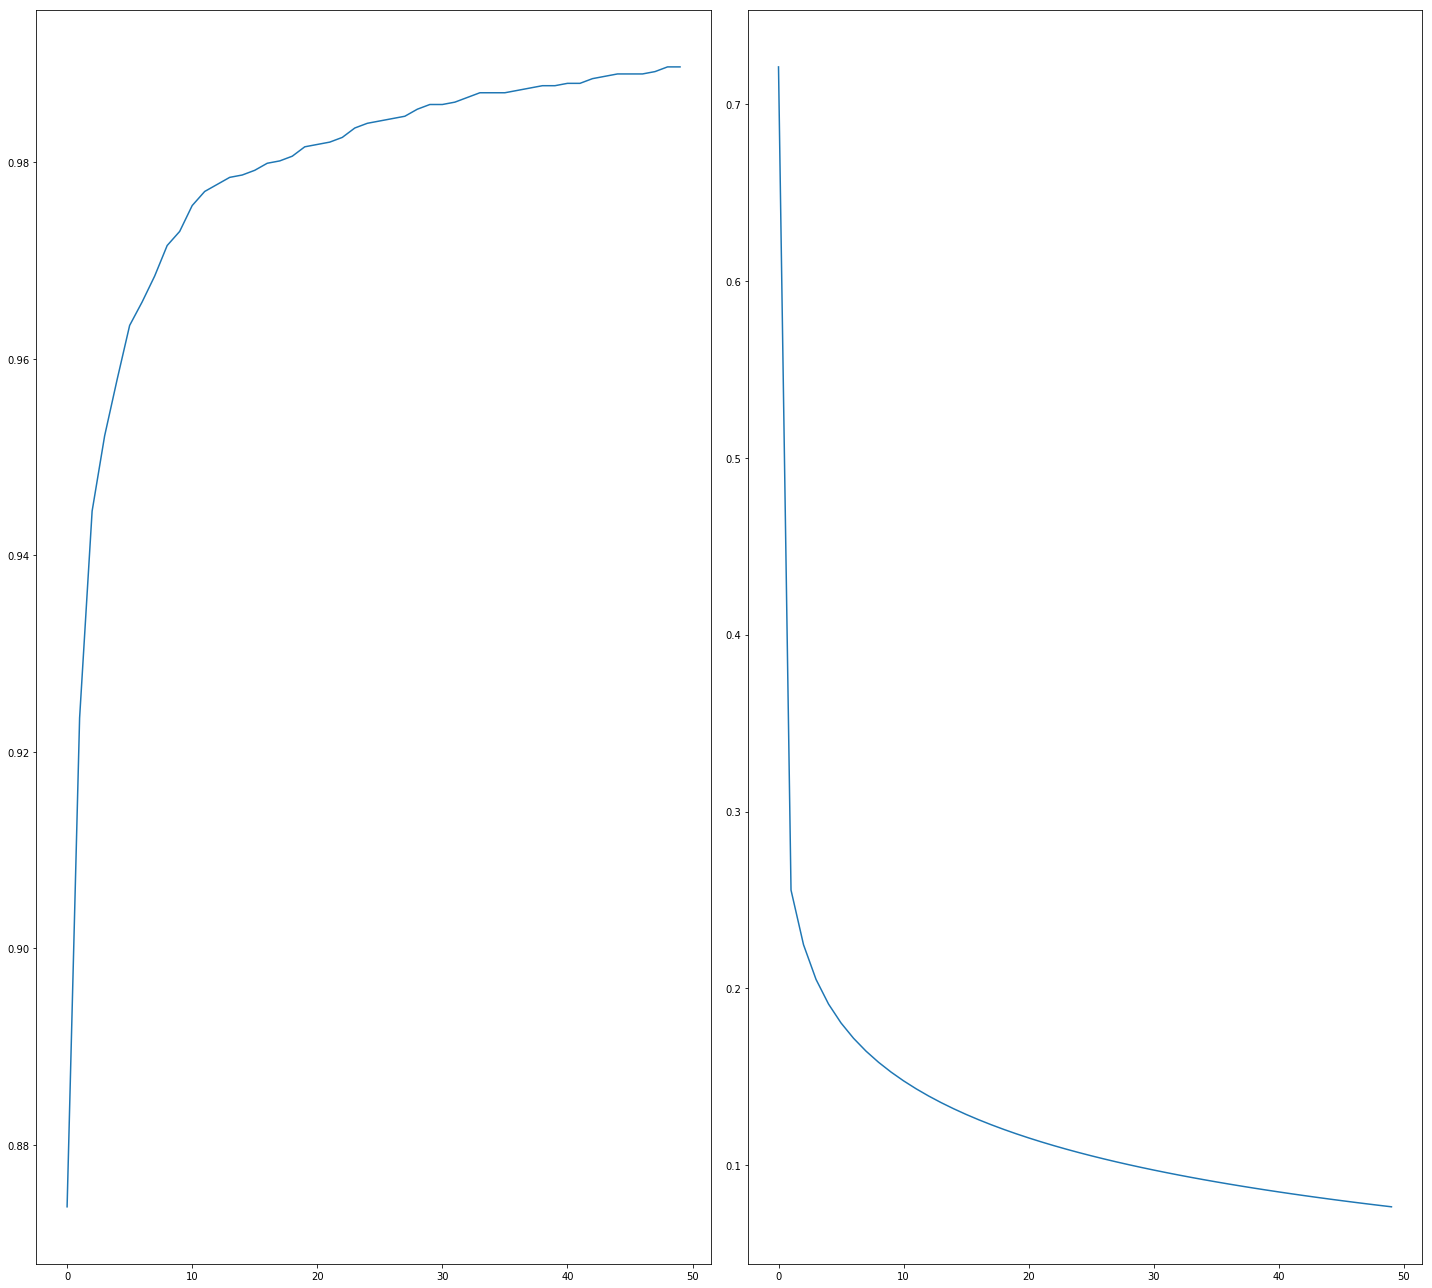

In [44]:
# TODO: use own logistic regression on dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

alg = LogReg()
alg.fit(X_train, Y_train, max_it=50, eps=1e-4, lr=20)

fig, axs = plt.subplots(ncols=2)
axs[0].plot(alg.accs)
axs[1].plot(alg.losses)
plt.tight_layout()

# TODO: determine train and test accuracy
test_preds = alg.predict(X_test)
test_acc = alg.acc(Y_test, test_preds)
train_preds = alg.predict(X_train)
train_acc = alg.acc(Y_train, train_preds)
print(f'Test: {test_acc}\tTrain: {train_acc}')

### Task 13 (3 Points)
Visualizing our classifier is not that easy anymore, as our features are in a high-dimensional space. 
Nevertheless, the values of $\hat{\theta}$ can tell us what words are indicators for the decision for spam/ham.

Use $\hat{\theta}$ and your word encoding to output the top 10 words for ham and spam.

In [ ]:
# TODO: use theta to print top 10 words for spam and ham
idx = np.argsort(alg.theta) # from low (ham) to high (spam)
words = vectorizer.get_feature_names()
words = [words[i] for i in idx]

ham_words = words[:10]
spam_words = words[-10:]

print(ham_words)
print(spam_words)

['ok', 'my', 'me', 'then', 'll', 'da', 'what', 'gt', 'lt', 'how']
['claim', 'stop', 'www', 'mobile', 'reply', 'won', '150p', 'uk', 'text', 'txt']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
